In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv(r'D:\data science\set\wine_data.csv',header=None,usecols=[0,1,2])
df.columns=['class label','alcohal','malic acid']

In [3]:
df

,class label,alcohal,malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


<Axes: xlabel='alcohal', ylabel='Density'>

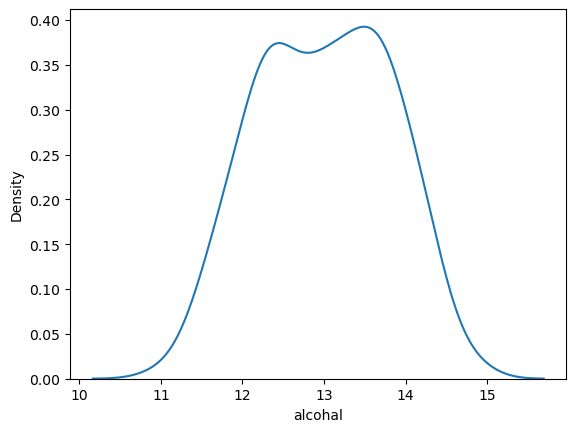

In [4]:
sns.kdeplot(df['alcohal'])

<Axes: xlabel='malic acid', ylabel='Density'>

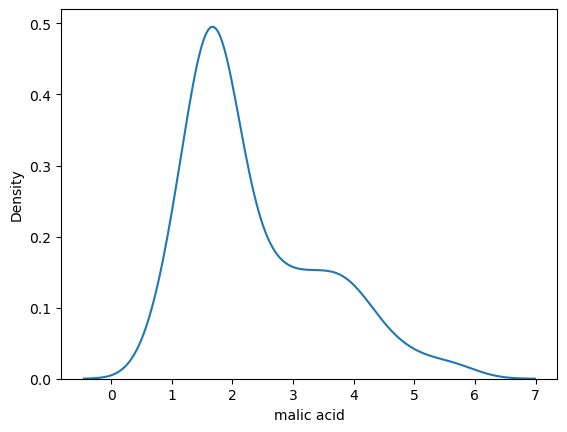

In [5]:
sns.kdeplot(df['malic acid'])

<Axes: xlabel='alcohal', ylabel='malic acid'>

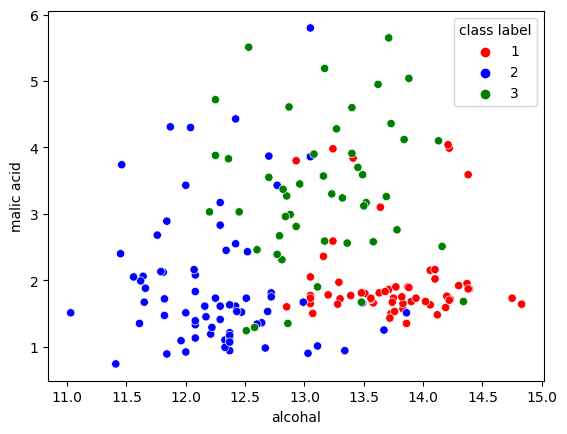

In [6]:
color_dict={1:'red',2:'blue',3:'green'}
sns.scatterplot(x=df['alcohal'],y=df['malic acid'],hue=df['class label'],palette=color_dict)

In [7]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(
    df.drop('class label', axis=1),  # Features (X)
    df['class label'],             # Target variable (y)
    test_size=0.3,                # Test set size (30%)
    random_state=0                # Random seed for reproducibility
)

# Check the shapes of the resulting datasets
x_train.shape, x_test.shape


((124, 2), (54, 2))

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler()
# fit the scaler to the train set,if will learn the parameter
scaler.fit(x_train)

# transfirm train and test
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [9]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [10]:
np.round(x_train.describe(),1)

,alcohal,malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [15]:
np.round(x_train_scaled.describe(),1)

,alcohal,malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


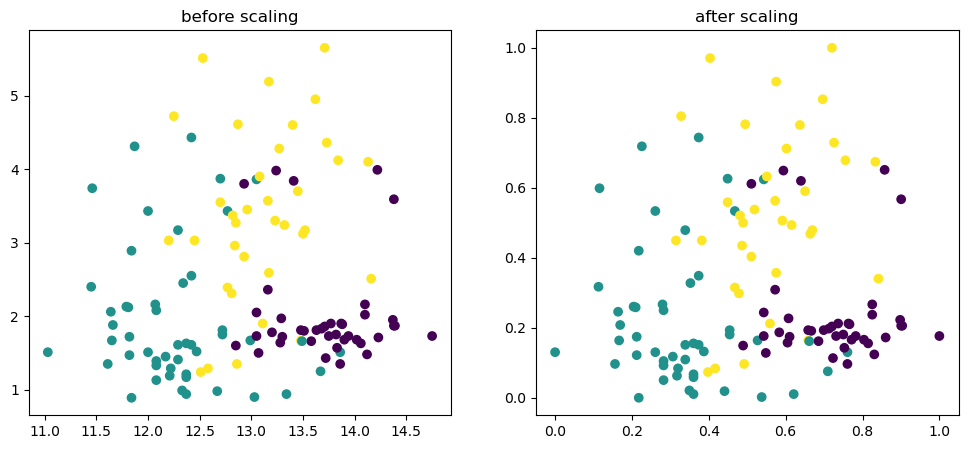

In [11]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
ax1.scatter(x_train['alcohal'],x_train['malic acid'],c=y_train)
ax1.set_title('before scaling')
ax2.scatter(x_train_scaled['alcohal'],x_train_scaled['malic acid'],c=y_train)
ax2.set_title('after scaling')
plt.show()

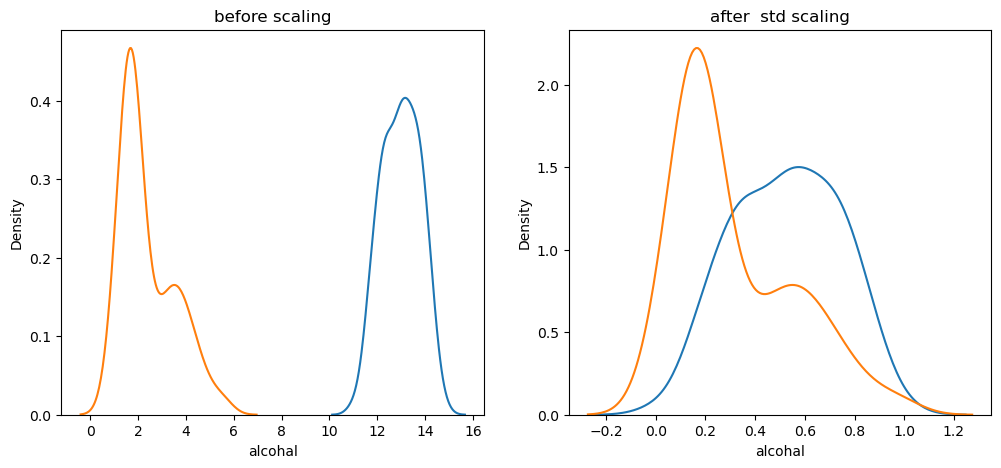

In [12]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# before scaling
ax1.set_title('before scaling')
sns.kdeplot(x_train['alcohal'],ax=ax1)
sns.kdeplot(x_train['malic acid'],ax=ax1)
# after scling
ax2.set_title('after  std scaling')
sns.kdeplot(x_train_scaled['alcohal'],ax=ax2)
sns.kdeplot(x_train_scaled['malic acid'],ax=ax2)
plt.show()


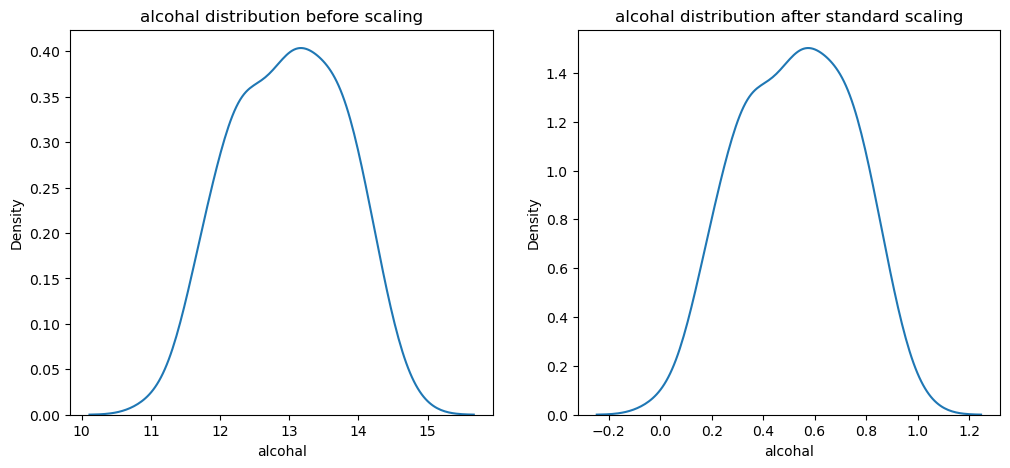

In [13]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# before scling
ax1.set_title('alcohal distribution before scaling')
sns.kdeplot(x_train['alcohal'],ax=ax1)
# after scling
ax2.set_title('alcohal distribution after standard scaling')
sns.kdeplot(x_train_scaled['alcohal'],ax=ax2)
plt.show()

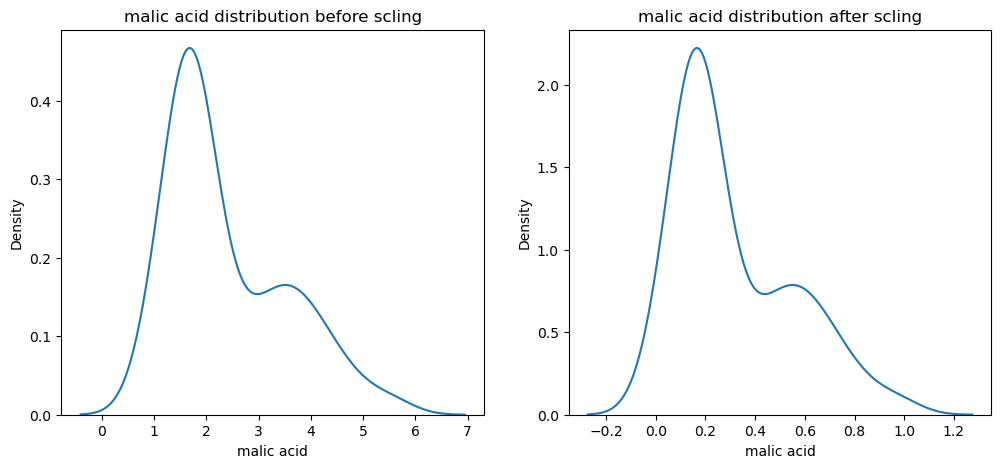

In [14]:
fig,(ax1,ax2)=plt.subplots(ncols=2,figsize=(12,5))
# before scling
ax1.set_title('malic acid distribution before scling')
sns.kdeplot(x_train['malic acid'],ax=ax1)
# after scling
ax2.set_title('malic acid distribution after scling')
sns.kdeplot(x_train_scaled['malic acid'],ax=ax2)
plt.show()